___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

**WELCOME!**

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


**Determines**

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






**Tasks**
- 1. Import Modules, Load Data and Data Review
- 2. Data Pre-Processing
- 3. Implement Linear Regression 
- 4. Implement Ridge Regression
- 5. Implement Lasso Regression 
- 6. Implement Elastic-Net
- 7. Visually Compare Models Performance In a Graph

# 1. Import Modules, Load Data and Data Review

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.6f}')
# pd.set_option('display.float_format', lambda x: '%.6f' % x)
# pd.options.display.float_format = '{:.3f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [2]:
# !pip install yellowbrick
from yellowbrick.features import RadViz
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.model_selection import FeatureImportances

In [3]:
# !pip install sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'c',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

In [5]:
df_origin = pd.read_csv('./final_scout_not_dummy.csv')
df = df_origin
df.head()

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
0,Audi A1,Sedans,15770,56013.000000,Used,1,Metallic,5.000000,Automatic,1422.000000,1220.000000,front,Diesel (Particulate Filter),99.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000000,3.000000,66.000000,12.000000,Cloth,3.800000
1,Audi A1,Sedans,14500,80000.000000,Used,0,Metallic,4.000000,Automatic,1798.000000,1255.000000,front,Benzine,129.000000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000000,2.000000,141.000000,15.646154,Cloth,5.600000
2,Audi A1,Sedans,14640,83450.000000,Used,0,Metallic,4.000000,Automatic,1598.000000,1250.000000,front,Diesel (Particulate Filter),99.000000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000000,3.000000,85.000000,12.000000,Cloth,3.800000
3,Audi A1,Sedans,14500,73000.000000,Used,0,Metallic,4.000000,Automatic,1422.000000,1195.000000,front,Diesel (Particulate Filter),99.000000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000000,3.000000,66.000000,12.000000,Cloth,3.800000
4,Audi A1,Sedans,16790,16200.000000,Used,1,Metallic,5.000000,Automatic,1422.000000,1195.000000,front,Diesel (Particulate Filter),109.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",5.000000,3.000000,66.000000,12.000000,Cloth,4.100000


In [6]:
df.shape

(14478, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14478 non-null  object 
 1   body_type            14478 non-null  object 
 2   price                14478 non-null  int64  
 3   km                   14478 non-null  float64
 4   type                 14478 non-null  object 
 5   inspection_new       14478 non-null  int64  
 6   paint_type           14478 non-null  object 
 7   nr_of_seats          14478 non-null  float64
 8   gearing_type         14478 non-null  object 
 9   displacement_cc      14478 non-null  float64
 10  weight_kg            14478 non-null  float64
 11  drive_chain          14478 non-null  object 
 12  fuel                 14478 non-null  object 
 13  co_2_emission        14478 non-null  float64
 14  comfort_convenience  14478 non-null  object 
 15  entertainment_media  14478 non-null 

In [8]:
df.describe(include='O').T

,count,unique,top,freq
make_model,14478,9,Audi A3,2815
body_type,14478,8,Sedans,7366
type,14478,5,Used,10213
paint_type,14478,3,Metallic,13990
gearing_type,14478,3,Manual,7354
drive_chain,14478,3,front,14290
fuel,14478,6,Benzine,7412
comfort_convenience,14478,6196,"Air conditioning,Electrical side mirrors,Hill ...",209
entertainment_media,14478,346,"Bluetooth,Hands-free equipment,On-board comput...",1340
extras,14478,659,Alloy wheels,4168


In [9]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
price,14478.000000,18133.509532,7423.709158,4950.000000,12950.000000,16977.000000,21900.000000,74600.000000
km,14478.000000,32186.251934,36787.168553,0.000000,3992.500000,20600.000000,46309.750000,317000.000000
inspection_new,14478.000000,0.662661,0.472818,0.000000,0.000000,1.000000,1.000000,1.000000
nr_of_seats,14478.000000,4.954137,0.490537,2.000000,5.000000,5.000000,5.000000,7.000000
displacement_cc,14478.000000,1428.946919,279.511354,890.000000,1229.000000,1461.000000,1598.000000,2480.000000
weight_kg,14478.000000,1348.285537,209.384976,840.000000,1165.000000,1280.000000,1472.000000,2471.000000
co_2_emission,14478.000000,117.061818,16.652849,80.000000,104.000000,116.000000,128.000000,164.000000
gears,14478.000000,5.888659,0.710810,5.000000,5.000000,6.000000,6.000000,9.000000
age,14478.000000,1.414111,1.105099,0.000000,0.000000,1.000000,2.000000,3.000000
hp_kw,14478.000000,88.583920,26.518329,51.000000,66.000000,85.000000,103.000000,294.000000


In [10]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
type                   0
inspection_new         0
paint_type             0
nr_of_seats            0
gearing_type           0
displacement_cc        0
weight_kg              0
drive_chain            0
fuel                   0
co_2_emission          0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
gears                  0
age                    0
hp_kw                  0
warranty_months        0
upholstery_type        0
cons_comb              0
dtype: int64

## EDA and Graphical analysis

### Feature Engineering - Categoric/Object Column

In [11]:
df.select_dtypes("O").head()

,make_model,body_type,type,paint_type,gearing_type,drive_chain,fuel,comfort_convenience,entertainment_media,extras,safety_security,upholstery_type
0,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Cloth
1,Audi A1,Sedans,Used,Metallic,Automatic,front,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Cloth
2,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Cloth
3,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Cloth
4,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Cloth


In [12]:
df.select_dtypes("O").nunique()

make_model                9
body_type                 8
type                      5
paint_type                3
gearing_type              3
drive_chain               3
fuel                      6
comfort_convenience    6196
entertainment_media     346
extras                  659
safety_security        4442
upholstery_type           6
dtype: int64

In [13]:
df['make_model'].value_counts()

Audi A3           2815
Audi A1           2419
Opel Insignia     2417
Opel Astra        2329
Opel Corsa        2059
Renault Clio      1514
Renault Espace     890
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

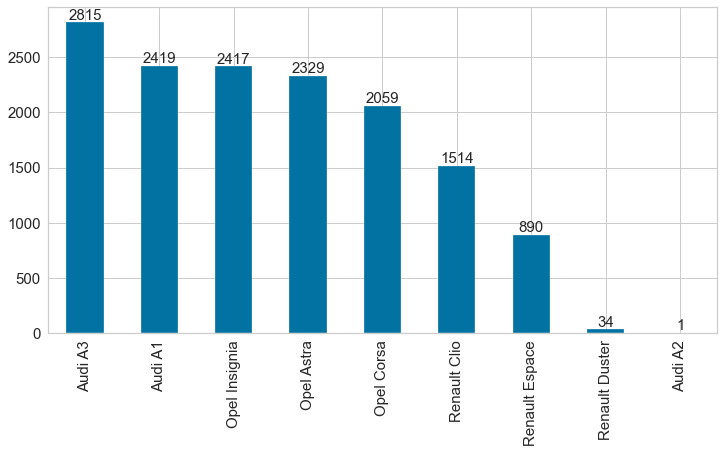

In [14]:
g = df.make_model.value_counts().plot.bar()
g.bar_label(g.containers[0]);

In [15]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
2419,Audi A2,Off-Road,28200,26166.000000,Employee's car,1,Metallic,5.000000,Manual,1598.000000,1734.000000,front,Diesel (Particulate Filter),120.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.000000,1.000000,85.000000,12.000000,Cloth,4.900000


In [16]:
df.drop(index=df[df.make_model=="Audi A2"].index, inplace =True)

In [17]:
df.shape

(14477, 24)

<AxesSubplot:xlabel='price', ylabel='Count'>

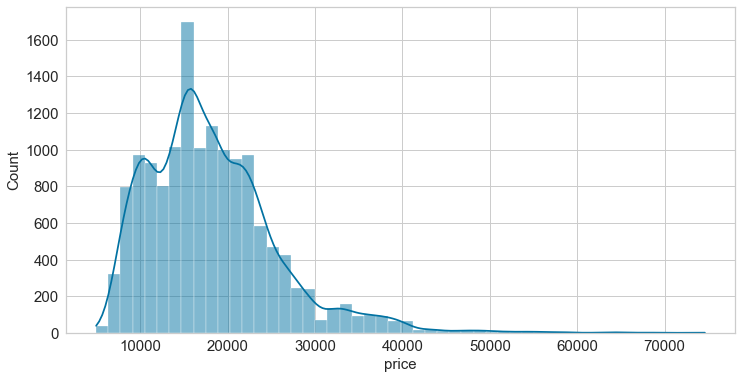

In [18]:
sns.histplot(df['price'], bins=50, kde=True)

In [19]:
skew(df['price']), kurtosis(df['price'])

(1.256966267780525, 3.056695732931841)

In [20]:
stats.describe(df['price'])

DescribeResult(nobs=14477, minmax=(4950, 74600), mean=18132.81418802238, variance=55108264.12394071, skewness=1.256966267780525, kurtosis=3.056695732931841)

In [21]:
d = stats.describe(df['price'])._asdict()
d

{'nobs': 14477,
 'minmax': (4950, 74600),
 'mean': 18132.81418802238,
 'variance': 55108264.12394071,
 'skewness': 1.256966267780525,
 'kurtosis': 3.056695732931841}

In [22]:
pd.DataFrame(d, columns=d.keys())

,nobs,minmax,mean,variance,skewness,kurtosis
0,14477,4950,18132.814188,55108264.123941,1.256966,3.056696
1,14477,74600,18132.814188,55108264.123941,1.256966,3.056696


In [23]:
pd.DataFrame.from_dict(stats.describe(df['price'])._asdict(), orient='index')

,0
nobs,14477
minmax,"(4950, 74600)"
mean,18132.814188
variance,55108264.123941
skewness,1.256966
kurtosis,3.056696


### Feature Engineering - Numeric Column

In [24]:
df_numeric = df.select_dtypes("number")
df_numeric

,price,km,inspection_new,nr_of_seats,displacement_cc,weight_kg,co_2_emission,gears,age,hp_kw,warranty_months,cons_comb
0,15770,56013.000000,1,5.000000,1422.000000,1220.000000,99.000000,5.000000,3.000000,66.000000,12.000000,3.800000
1,14500,80000.000000,0,4.000000,1798.000000,1255.000000,129.000000,7.000000,2.000000,141.000000,15.646154,5.600000
2,14640,83450.000000,0,4.000000,1598.000000,1250.000000,99.000000,5.000000,3.000000,85.000000,12.000000,3.800000
3,14500,73000.000000,0,4.000000,1422.000000,1195.000000,99.000000,6.000000,3.000000,66.000000,12.000000,3.800000
4,16790,16200.000000,1,5.000000,1422.000000,1195.000000,109.000000,5.000000,3.000000,66.000000,12.000000,4.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
14473,39950,1000.000000,1,7.000000,1798.000000,1685.000000,153.000000,7.000000,0.000000,165.000000,38.769231,6.800000
14474,39950,10.000000,0,5.000000,1997.000000,1758.000000,139.000000,6.000000,2.000000,147.000000,24.000000,5.300000
14475,39885,9900.000000,1,5.000000,1798.000000,1708.000000,152.000000,7.000000,0.000000,165.000000,38.769231,7.400000
14476,39875,15.000000,1,7.000000,1997.000000,1734.000000,139.000000,6.000000,0.000000,146.000000,38.769231,5.300000


<AxesSubplot:>

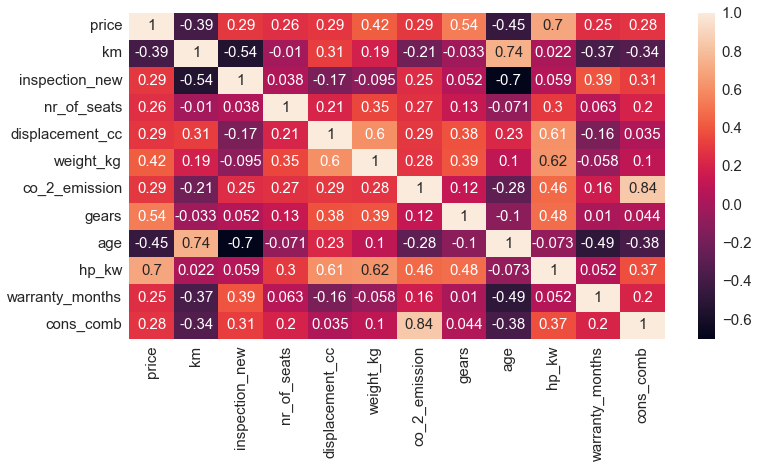

In [25]:
sns.heatmap(df_numeric.corr(), annot =True)

### `Multicolinarity` Check Colorized Correlation

In [26]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

In [27]:
check_multicolinarity(df)

Multicolinarity Data (0, 0)


In [28]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

False

### Check Target Feature

<AxesSubplot:xlabel='price'>

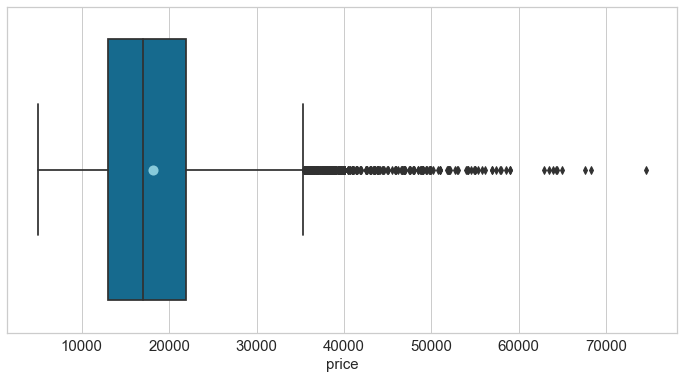

In [29]:
sns.boxplot(df.price)

In [30]:
df.groupby('make_model')[['price']].describe().T

make_model       Audi A1      Audi A3   Opel Astra   Opel Corsa  \
price count  2419.000000  2815.000000  2329.000000  2059.000000   
      mean  18824.266226 21040.355950 15971.878918 11104.230695   
      std    4494.313009  5084.676155  5021.903624  2995.142415   
      min    8999.000000  5555.000000  6000.000000  4950.000000   
      25%   15600.000000 17915.000000 12460.000000  8700.000000   
      50%   17880.000000 20900.000000 15390.000000 10499.000000   
      75%   21900.000000 23490.000000 18000.000000 13590.000000   
      max   37900.000000 74600.000000 39433.000000 18622.000000   

make_model   Opel Insignia  Renault Clio  Renault Duster  Renault Espace  
price count    2417.000000   1514.000000       34.000000      890.000000  
      mean    21564.633016  11987.845443    13230.176471    30293.247191  
      std      7792.958772   4252.654023     1622.404678     8822.578258  
      min      8290.000000   5445.000000    10850.000000    12614.000000  
      25%     15600.000000   9268.750000    11925.000000    23912.500000  
      50%     19990.000000  10595.500000    13189.000000    28990.000000  
      75%     24470.000000  14493.750000    14399.000000    35261.500000  
      max     52120.000000  31500.000000    16033.000000    68320.000000

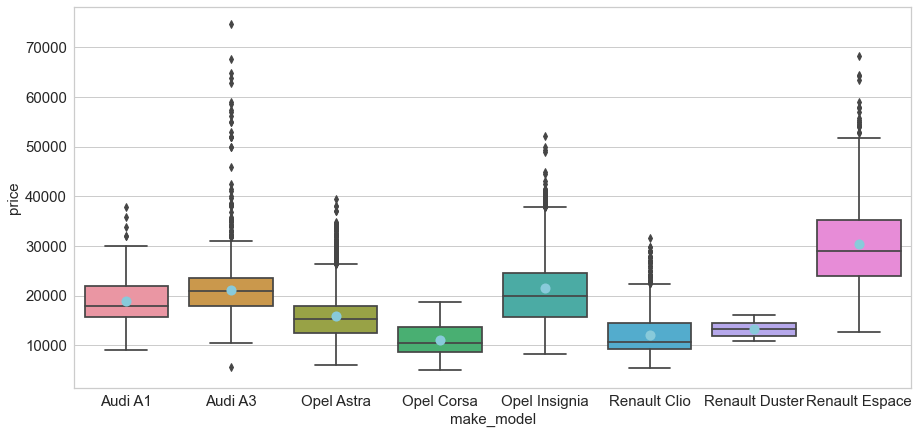

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
plt.show()

### Check Count Outliers

In [32]:
df[df["make_model"]== "Audi A1"]["price"].sort_values()

25      8999
61      9950
63     10000
62     10300
64     10490
       ...  
650    31990
647    32000
673    33900
672    35900
653    37900
Name: price, Length: 2419, dtype: int64

In [33]:
total_outliers = []

for model in df["make_model"].unique():
    
    car_prices = df[df["make_model"]==model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 57   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 130  ,           The rate of outliers : 0.056
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 113  ,           The rate of outliers : 0.047
 The count of outlier for Renault Clio    : 61   ,           The rate of outliers : 0.04
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 19   ,           The rate of outliers : 0.021

Total_outliers :  385 The rate of total outliers : 0.027


# 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

## Features and Target variable Split
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [34]:
X = df.drop(columns='price')
y = df['price']

## Train | Test Split
- Split the data into training and testing sets
- get_dummies for X_train and X_test - for data separated by ','
- OneHotEncoder for X_train and X_test

In [35]:
from sklearn.model_selection import train_test_split

### `get_dummies` for X_train and X_test - for data separated by ','
- if data separated by ',', we will get dummy.

In [36]:
def trans_1(X, y, test_size = 0.2, random_state=101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    X_train = X_train.join(X_train["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_train = X_train.join(X_train["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_train = X_train.join(X_train["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_train = X_train.join(X_train["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    
    X_test = X_test.join(X_test["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_test = X_test.join(X_test["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_test = X_test.join(X_test["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_test = X_test.join(X_test["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"
    
    
    X_train.drop(columns=["comfort_convenience","entertainment_media","extras","safety_security"], inplace = True)
    X_test.drop(columns=["comfort_convenience","entertainment_media","extras","safety_security"], inplace = True)
    
    
    return X_train, X_test, y_train, y_test

In [37]:
def trans_1_get_dummies(X, y, nunique=10, test_size = 0.2, random_state=101, df=X): 
    '''Object column X if you change X, specify it in parameter'''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    df_object = df.select_dtypes(include ="O")
    dummy_col = df_object.nunique()[df_object.nunique()>nunique].index
    prefix = [i[0]+i.split('_')[1][0]+'_' if '_' in i else i[:2]+'_' for i in dummy_col]
    
    for col, pre in zip(dummy_col, prefix):
        X_train = X_train.join(X_train[col].str.get_dummies(sep = ",").add_prefix(pre))
        X_test = X_test.join(X_test[col].str.get_dummies(sep = ",").add_prefix(pre))
    
    X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"
    
    X_train.drop(columns=dummy_col, inplace = True)
    X_test.drop(columns=dummy_col, inplace = True)
    
    return X_train, X_test, y_train, y_test

In [38]:
# check high nunique data separated by ','
X.select_dtypes(include ="O").nunique()

make_model                8
body_type                 8
type                      5
paint_type                3
gearing_type              3
drive_chain               3
fuel                      6
comfort_convenience    6196
entertainment_media     346
extras                  659
safety_security        4442
upholstery_type           6
dtype: int64

In [39]:
X_train, X_test, y_train, y_test = trans_1_get_dummies(X, y, nunique=10)

In [40]:
# get_dummies applied for comma separated data in columns
X_train.select_dtypes('O').nunique()

make_model         8
body_type          8
type               5
paint_type         3
gearing_type       3
drive_chain        3
fuel               6
upholstery_type    6
dtype: int64

### `OneHotEncoder` for X_train and X_test

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
def trans_2(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns
    cat = list(cat)
    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
    
    return X_train, X_test

In [43]:
def trans_2_OneHotEncoder(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns.to_list()
    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
        
    return X_train, X_test

In [44]:
X_train, X_test = trans_2_OneHotEncoder(X_train, X_test)

In [45]:
X_train.shape, X_test.shape

((11581, 146), (2896, 146))

In [46]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,11581.000000,0.167861,0.373759,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,11581.000000,0.192989,0.394661,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,11581.000000,0.157758,0.364530,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,11581.000000,0.141352,0.348400,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,11581.000000,0.170279,0.375894,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
ss_Side airbag,11581.000000,0.888352,0.314947,0.000000,1.000000,1.000000,1.000000,1.000000
ss_Tire pressure monitoring system,11581.000000,0.702271,0.457279,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traction control,11581.000000,0.747431,0.434504,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traffic sign recognition,11581.000000,0.135567,0.342343,0.000000,0.000000,0.000000,0.000000,1.000000


In [47]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,2896.000000,0.164019,0.370357,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,2896.000000,0.200276,0.400276,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,2896.000000,0.173343,0.378609,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,2896.000000,0.145718,0.352884,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,2896.000000,0.153660,0.360685,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
ss_Side airbag,2896.000000,0.897099,0.303881,0.000000,1.000000,1.000000,1.000000,1.000000
ss_Tire pressure monitoring system,2896.000000,0.708564,0.454503,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traction control,2896.000000,0.755870,0.429644,0.000000,1.000000,1.000000,1.000000,1.000000
ss_Traffic sign recognition,2896.000000,0.133978,0.340687,0.000000,0.000000,0.000000,0.000000,1.000000


## Scaling the Data
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [49]:
scaler = MinMaxScaler() 

# Use train - calc mean and sd
scaler.fit(X_train)

MinMaxScaler()

In [50]:
# Use scaler calc scaled data
# if you don't use pipeline, you can use scaled data directly
X_train_scaled = scaler.transform(X_train) 
X_test_scaled  = scaler.transform(X_test)

In [51]:
# check X_train_scaled
pd.DataFrame(X_train_scaled, columns=X_train.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,11581.000000,0.167861,0.373759,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,11581.000000,0.192989,0.394661,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,11581.000000,0.157758,0.364530,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,11581.000000,0.141352,0.348400,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,11581.000000,0.170279,0.375894,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
ss_Side airbag,11581.000000,0.888352,0.314947,0.000000,1.000000,1.000000,1.000000,1.000000
ss_Tire pressure monitoring system,11581.000000,0.702271,0.457279,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traction control,11581.000000,0.747431,0.434504,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traffic sign recognition,11581.000000,0.135567,0.342343,0.000000,0.000000,0.000000,0.000000,1.000000


In [52]:
# check X_test_scaled
pd.DataFrame(X_test_scaled, columns=X_test.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,2896.000000,0.164019,0.370357,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,2896.000000,0.200276,0.400276,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,2896.000000,0.173343,0.378609,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,2896.000000,0.145718,0.352884,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,2896.000000,0.153660,0.360685,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
ss_Side airbag,2896.000000,0.897099,0.303881,0.000000,1.000000,1.000000,1.000000,1.000000
ss_Tire pressure monitoring system,2896.000000,0.708564,0.454503,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traction control,2896.000000,0.755870,0.429644,0.000000,1.000000,1.000000,1.000000,1.000000
ss_Traffic sign recognition,2896.000000,0.133978,0.340687,0.000000,0.000000,0.000000,0.000000,1.000000


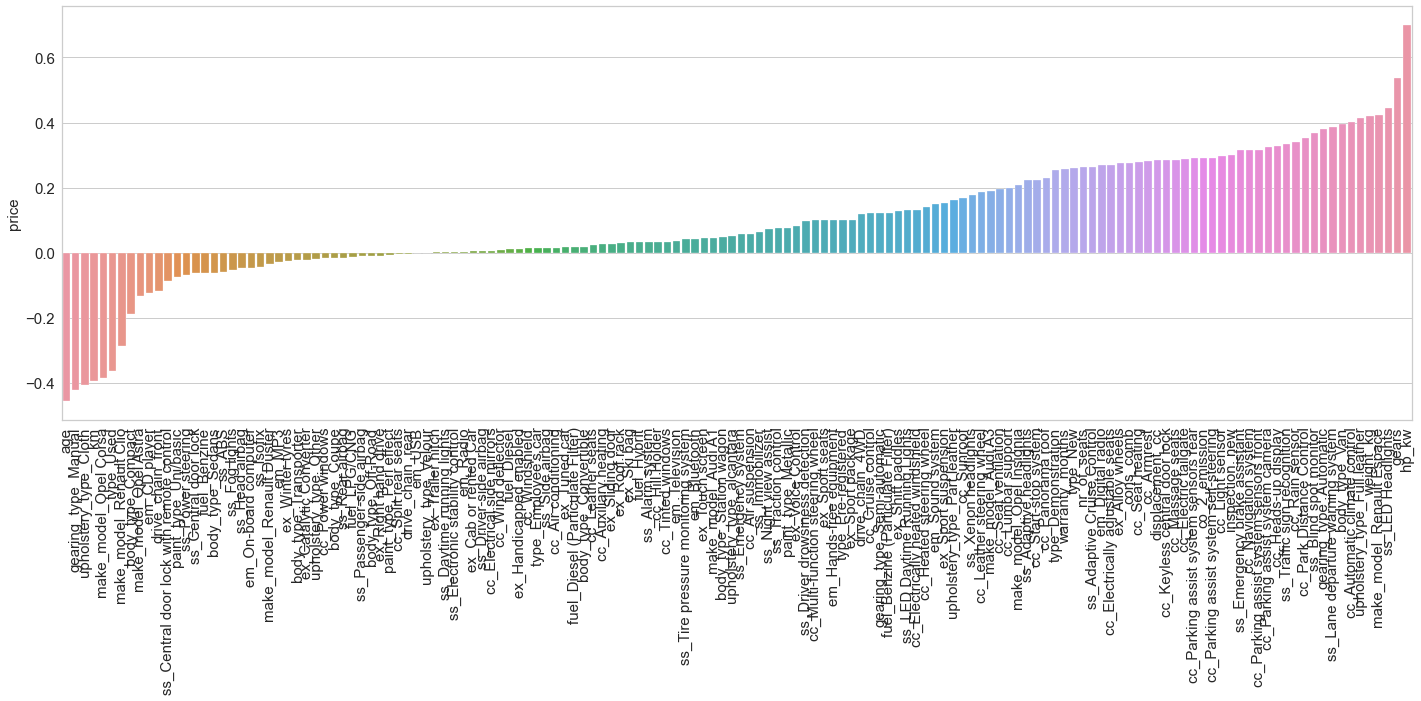

In [53]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]

plt.figure(figsize=(20,10))
sns.barplot(x=corr_by_price.index, y=corr_by_price)

plt.xticks(rotation=90)
plt.tight_layout();

# 3. Implement `Linear` Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [54]:
from sklearn.linear_model import LinearRegression

## Linear Model Fitting and Predicting with `Scale - without Pipeline`
- Can use Scaled `X_train_scaled, X_test_scaled` or not Scaled `X_train, X_test` Datas

In [55]:
lin_model = LinearRegression() 

lin_model.fit(X_train_scaled, y_train)

LinearRegression()

In [56]:
y_pred = lin_model.predict(X_test_scaled)
y_train_pred = lin_model.predict(X_train_scaled)

In [57]:
def check_pred_data_describe(y_pred, y_train_pred):
    test = pd.DataFrame(y_pred, columns=['y_pred']).describe().T
    train = pd.DataFrame(y_train_pred, columns=['y_train_pred']).describe().T
    return pd.concat([test, train])

In [58]:
# pred data
check_pred_data_describe(y_pred, y_train_pred)

,count,mean,std,min,25%,50%,75%,max
y_pred,2896.000000,18178.118094,6988.580578,346.000000,13435.500000,17641.000000,22556.000000,49624.000000
y_train_pred,11581.000000,18125.680338,7029.639206,-2458.000000,13318.000000,17644.000000,22420.000000,51624.000000


In [59]:
# actual data vs pred data cross check
pd.concat([y_test, y_train], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
price,2896.000000,18160.182320,7385.653843,5450.000000,13000.000000,16980.000000,21900.000000,68320.000000
price,11581.000000,18125.970383,7433.228386,4950.000000,12910.000000,16960.000000,21920.000000,74600.000000


### Evaluation-Error Metric Check R^2 Score
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# same train_val function
def get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, model_name="linear"):      
    train = pd.Series({
            "R2"   : r2_score(y_train, y_train_pred),
            "MAE"  : mean_absolute_error(y_train, y_train_pred),
            "MSE"  : mean_squared_error(y_train, y_train_pred),                          
            "RMSE" : np.sqrt(mean_squared_error(y_train, y_train_pred))}).to_frame(model_name+"_train")

    test = pd.DataFrame.from_dict({
            "R2"   : r2_score(y_test, y_pred),
            "MAE"  : mean_absolute_error(y_test, y_pred),
            "MSE"  : mean_squared_error(y_test, y_pred),
            "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred))}, orient='index', columns=[model_name+"_test"])

    # merge (inner join by default)
    scores1 = pd.merge(train, test, left_index=True, right_index=True)
    
#     # join (left join by default)
#     scores2 = train.join(test)
#     # concat (outer join by default)
#     scores3 = pd.concat([train, test], axis=1)
#     # append not recommended - use concat
#     scores4 = train.append(test)
    
    # convert MultiIndex
    cols = scores1.columns.str.extract(r'(.+)_(.+)', expand=True)
    scores1.columns = pd.MultiIndex.from_arrays((cols[0], cols[0]+'_'+cols[1]))
    
    return scores1

In [61]:
# Evaluate the result. Overfitting?
ls = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "linear")
ls

0            linear               
       linear_train    linear_test
R2         0.889596       0.880148
MAE     1743.480097    1754.716851
MSE  6099597.123133 6535391.303867
RMSE    2469.736246    2556.441140

In [62]:
# check
2438.579185/y.mean()

0.13448431995794685

### Adjusted R2 Score

In [63]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [64]:
y_pred_adj = lin_model.predict(X_test)

In [65]:
adj_r2(y_test, y_pred_adj, X)

-7378421065.491198

### Linear Model Cross Validation

In [66]:
from sklearn.model_selection import cross_validate, cross_val_score

In [67]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [68]:
model = LinearRegression()

# cross_validate with empty model - fit and predict 
# Check not Scaled X_train or Scaled X_train_scaled
scores = cross_validate(
    model, X_train_scaled, y_train, 
    scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error'], 
    cv = 5
)

In [69]:
df_scores_lm = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lm

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.042810,0.001995,0.894419,-1704.641562,-5710482.733168,-2389.661636
1,0.044003,0.002001,0.893602,-1720.176166,-5670410.405009,-2381.262355
2,0.042000,0.000998,0.873649,-1819.363990,-7050872.656736,-2655.347935
3,0.040000,0.002000,0.879367,-1826.638601,-6762243.552245,-2600.431417
4,0.044001,0.002003,-38071750225363550208.000000,-1367538218547.310791,-2165646176590422121415442432.000000,-46536503699680.984375


In [70]:
df_scores_lm.iloc[:, 2:].mean()

test_r2                                    -7614350045072709632.000000
test_neg_mean_absolute_error                      -273507645123.626221
test_neg_mean_squared_error        -433129235318084396795297792.000000
test_neg_root_mean_squared_error                 -9307300741941.537109
dtype: float64

In [71]:
# crosscheck before-after
ls

0            linear               
       linear_train    linear_test
R2         0.889596       0.880148
MAE     1743.480097    1754.716851
MSE  6099597.123133 6535391.303867
RMSE    2469.736246    2556.441140

#### Train Residual Mean check percent - Cross Validation RMSE

In [72]:
def check_cv_rmse_mean_div_target(train_rmse_mean, cv_rmse_mean, y=y, df=df):
    return pd.DataFrame.from_dict({
        "train RMSE percent(%)": train_rmse_mean/y.mean(),
        "CV RMSE percent(%)"   : cv_rmse_mean/y.mean()}
        , orient='index', columns=['RMSE/target(label)_percent(%)'])

In [73]:
check_cv_rmse_mean_div_target(
    np.sqrt(mean_squared_error(y_train, y_train_pred)), 
    df_scores_lm['test_neg_root_mean_squared_error'].mean()) 

,RMSE/target(label)_percent(%)
train RMSE percent(%),0.136203
CV RMSE percent(%),-513284956.512126


### Coefficient - Slope Calculate 

In [74]:
def get_coeff_intercept(coeff_, intercept_, model_name='linear', columns=X_train.columns):
    coefficients = pd.DataFrame(coeff_, columns = [f'Coefficient_{model_name}'], index=columns)
    intercept    = pd.DataFrame({f'Coefficient_{model_name}': intercept_}, index=['intercept'])
    return pd.concat([coefficients, intercept])

In [75]:
# Calc Slope
lm_df = get_coeff_intercept(
    lin_model.coef_, 
    lin_model.intercept_
)
lm_df

,Coefficient_linear
make_model_Audi A1,-17459085174810914.000000
make_model_Audi A3,-17459085174809720.000000
make_model_Opel Astra,-17459085174814902.000000
make_model_Opel Corsa,-17459085174816228.000000
make_model_Opel Insignia,-17459085174811982.000000
...,...
ss_Tire pressure monitoring system,36.500000
ss_Traction control,221.562500
ss_Traffic sign recognition,-92.000000
ss_Xenon headlights,-334.000000


### **Result:________**

- R2 score is high but
- R2 and RMSE check cross validation not not suitable all time, because of dummy column count

## Calculate Residuals & Visually Compare Residuals

Why do we use the least squares error method to find the regression line that best fits the data?

In [76]:
df_comparing = pd.DataFrame({"Actual": y_test, "Prediction": y_pred, "Residual":y_pred-y_test})
# which datas have most error
df_comparing.sort_values(by='Residual', key=abs, ascending=False).head()

,Actual,Prediction,Residual
14392,68320,41020.000000,-27300.000000
13902,46895,27838.000000,-19057.000000
9945,11600,28954.000000,17354.000000
11766,48950,32114.000000,-16836.000000
2956,5555,22190.000000,16635.000000


In [77]:
# check Residual
df_comparing.describe().T

,count,mean,std,min,25%,50%,75%,max
Actual,2896.000000,18160.182320,7385.653843,5450.000000,13000.000000,16980.000000,21900.000000,68320.000000
Prediction,2896.000000,18178.118094,6988.580578,346.000000,13435.500000,17641.000000,22556.000000,49624.000000
Residual,2896.000000,17.935773,2556.819700,-27300.000000,-1162.250000,96.000000,1380.500000,17354.000000


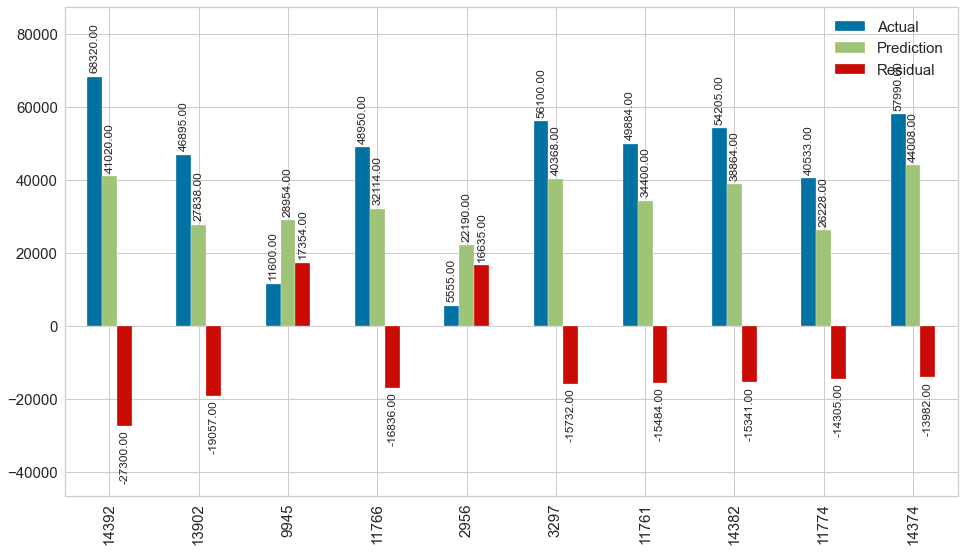

In [78]:
g = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head(10).plot.bar(figsize=(16,9))

# annotate
for i in g.containers:
    g.bar_label(i, fmt='%.2f', fontsize=12, rotation=90, padding=4)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.2) 

# tick_params(xaxis.set_tick_params) rotation or labelrotation
g.tick_params(axis='x', labelrotation=90)

### Check datas have `most Residual-Error`

In [79]:
# indexes which datas have most error
index = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head().index

In [80]:
# check datas have most error
df.loc[index]

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
14392,Renault Espace,Van,68320,4307.000000,Demonstration,1,Metallic,4.000000,Automatic,1598.000000,1734.000000,front,Diesel (Particulate Filter),120.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000000,0.000000,118.000000,24.000000,Full leather,6.500000
13902,Renault Espace,Sedans,46895,55000.000000,New,0,Metallic,7.000000,Manual,1997.000000,2044.000000,front,Diesel (Particulate Filter),139.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen,Voice Control","ABS,Blind spot monitor,Central door lock,Dayti...",6.000000,3.000000,147.000000,12.000000,Part leather,5.400000
9945,Opel Insignia,Sedans,11600,68000.000000,Used,0,Metallic,5.000000,Automatic,1998.000000,1440.000000,front,Benzine,138.000000,"Air conditioning,Armrest,Automatic climate con...","CD player,MP3,On-board computer","Alloy wheels,Roof rack,Ski bag","ABS,Central door lock with remote control,Driv...",6.000000,2.000000,191.000000,12.000000,Full leather,8.600000
11766,Opel Insignia,Sedans,48950,100.000000,New,1,Metallic,5.000000,Manual,1956.000000,1503.000000,4WD,Diesel (Particulate Filter),145.000000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive Cruise Control,Central door lock,...",6.000000,0.000000,125.000000,27.428571,Full leather,4.616667
2956,Audi A3,Station wagon,5555,5558.000000,Used,1,Metallic,5.000000,Manual,1968.000000,1465.000000,front,Diesel (Particulate Filter),127.000000,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Voice Control","ABS,Central door lock with remote control,Driv...",6.000000,1.000000,110.000000,27.000000,Cloth,4.800000


### Check Residuals - Scatterplot

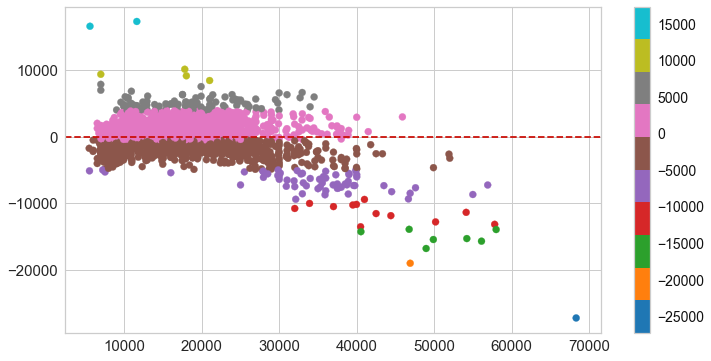

In [81]:
# Residuals scatterplot
plt.scatter(x=y_test, y=(y_pred-y_test), c=(y_pred-y_test), cmap= 'tab10') 
plt.axhline(y = 0, color ="r", linestyle = "--")

# colorbar tick_params
plt.colorbar().ax.tick_params(axis='both', labelsize=14, colors='k')

### Check Residuals - Probplot

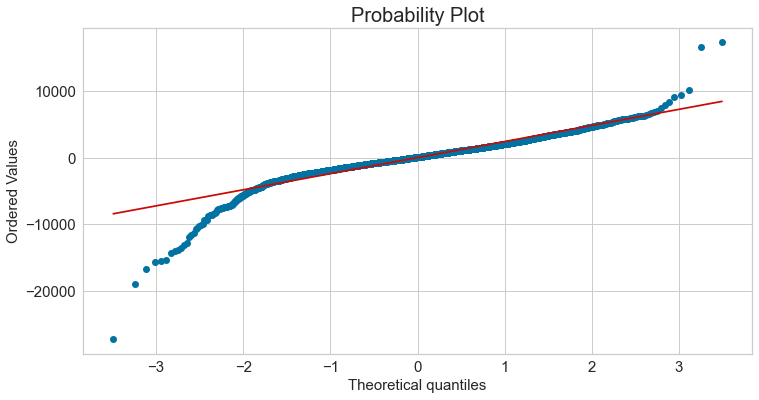

In [82]:
stats.probplot((y_pred-y_test), dist ="norm", plot =plt);

In [83]:
stats.describe((y_pred-y_test))

DescribeResult(nobs=2896, minmax=(-27300.0, 17354.0), mean=17.935773480662984, variance=6537326.976184409, skewness=-1.3204286386877768, kurtosis=11.304811127969506)

In [84]:
pd.DataFrame.from_dict(stats.describe((y_pred-y_test))._asdict(), orient='index')

,0
nobs,2896
minmax,"(-27300.0, 17354.0)"
mean,17.935773
variance,6537326.976184
skewness,-1.320429
kurtosis,11.304811


### Check Residuals - ResidualsPlot

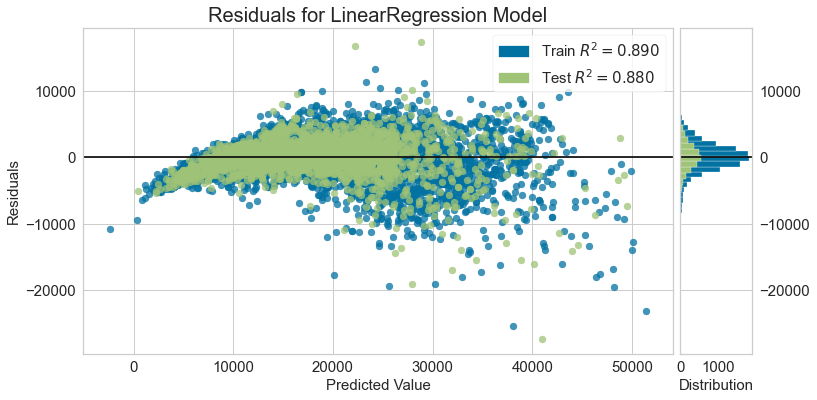

In [85]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

### Check Residuals - PredictionError

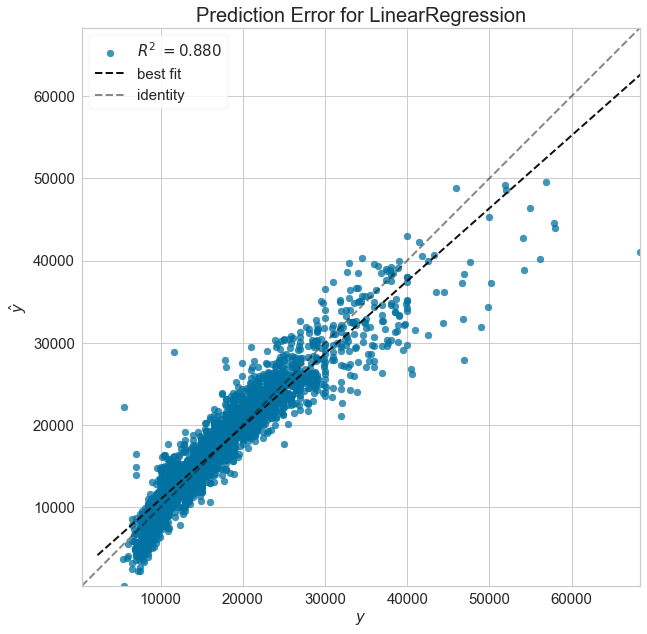

In [86]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = RadViz(size=(720, 3000))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

## `Dropping outliers` that worsen my predictions from the dataset - `without Scale - without Pipeline`

In [87]:
df2 = df.copy()

for model in df2.make_model.unique():
    
    car_prices = df2[df2["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
    
df2.head(2)

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
0,Audi A1,Sedans,15770,56013.000000,Used,1,Metallic,5.000000,Automatic,1422.000000,1220.000000,front,Diesel (Particulate Filter),99.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000000,3.000000,66.000000,12.000000,Cloth,3.800000
1,Audi A1,Sedans,14500,80000.000000,Used,0,Metallic,4.000000,Automatic,1798.000000,1255.000000,front,Benzine,129.000000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000000,2.000000,141.000000,15.646154,Cloth,5.600000


In [88]:
df.shape, df2.shape

((14477, 24), (14092, 24))

In [89]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = trans_1_get_dummies(X, y)
X_train, X_test = trans_2_OneHotEncoder(X_train, X_test)

# if you don't use pipeline, you can use scaled data directly
scaler = MinMaxScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled  = scaler.transform(X_test)

lin_model2 = LinearRegression()
lin_model2.fit(X_train,y_train)
y_pred = lin_model2.predict(X_test)
y_train_pred = lin_model2.predict(X_train)

ls2 = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "linear2")
ls2

0           linear2               
      linear2_train   linear2_test
R2         0.898319       0.892066
MAE     1545.476331    1523.498603
MSE  4735187.470576 4608127.614468
RMSE    2176.048591    2146.654983

In [90]:
y_pred_adj = lin_model2.predict(X_test)
adj_r2(y_test, y_pred_adj, X)

0.891889190219525

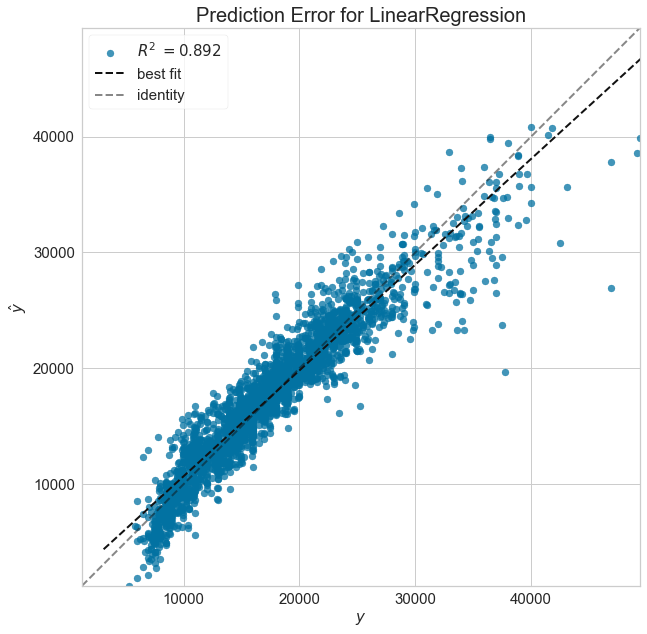

In [91]:
model = LinearRegression()

visualizer = RadViz(size=(720, 3000))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

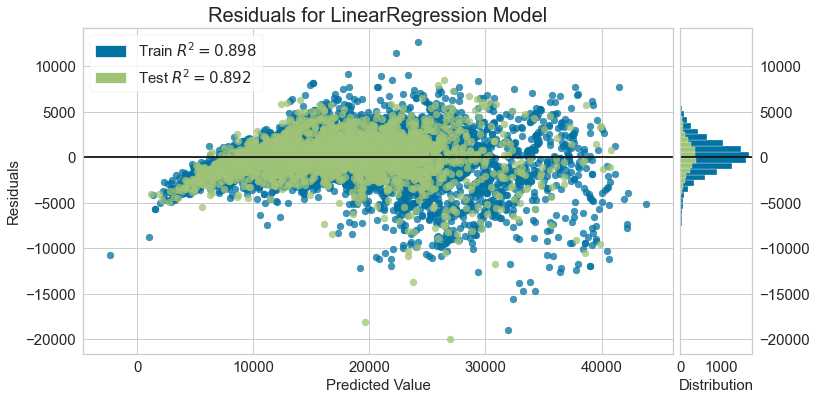

In [92]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

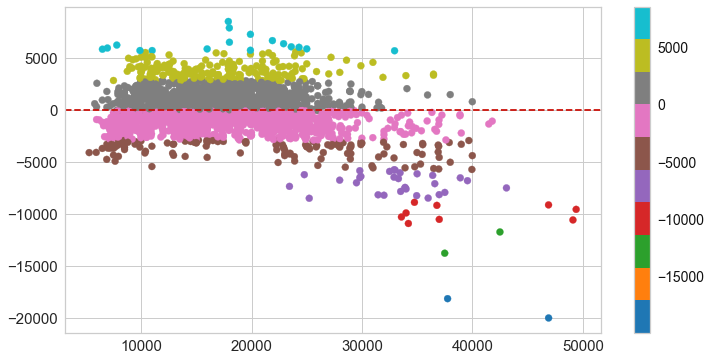

In [93]:
# Residuals scatterplot
plt.scatter(x=y_test, y=(y_pred-y_test), c=(y_pred-y_test), cmap= 'tab10') 
plt.axhline(y = 0, color ="r", linestyle = "--")

# colorbar tick_params
plt.colorbar().ax.tick_params(axis='both', labelsize=14, colors='k')

In [94]:
model = LinearRegression()

# cross_validate with empty model - fit and predict 
# Check not Scaled X_train or Scaled X_train_scaled
scores = cross_validate(
    model, X_train, y_train, 
    scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error'], 
    cv = 5
)

In [95]:
df_scores_lm = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lm

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.041999,0.004003,0.896522,-1579.119641,-4849424.322341,-2202.140850
1,0.037999,0.004028,0.892873,-1602.977698,-4956168.515391,-2226.245385
2,0.039034,0.003968,0.883583,-1611.407735,-5518720.360055,-2349.195684
3,0.040964,0.004000,0.900022,-1500.651438,-4457184.551420,-2111.204526
4,0.043547,0.004453,0.899154,-1559.559593,-4811671.170159,-2193.552181


In [96]:
df_scores_lm.iloc[:, 2:].mean()

test_r2                                   0.894431
test_neg_mean_absolute_error          -1570.743221
test_neg_mean_squared_error        -4918633.783873
test_neg_root_mean_squared_error      -2216.467725
dtype: float64

In [97]:
ls2

0           linear2               
      linear2_train   linear2_test
R2         0.898319       0.892066
MAE     1545.476331    1523.498603
MSE  4735187.470576 4608127.614468
RMSE    2176.048591    2146.654983

In [98]:
df_comparing = pd.DataFrame({"Actual": y_test, "Prediction": y_pred, "Residual":y_pred-y_test})
# which datas have most error
df_comparing.sort_values(by='Residual', key=abs, ascending=False).head()

,Actual,Prediction,Residual
13902,46895,26934.676988,-19960.323012
11458,37750,19646.080676,-18103.919324
11784,37490,23751.192221,-13738.807779
14452,42490,30790.372480,-11699.627520
11847,34200,23316.310743,-10883.689257


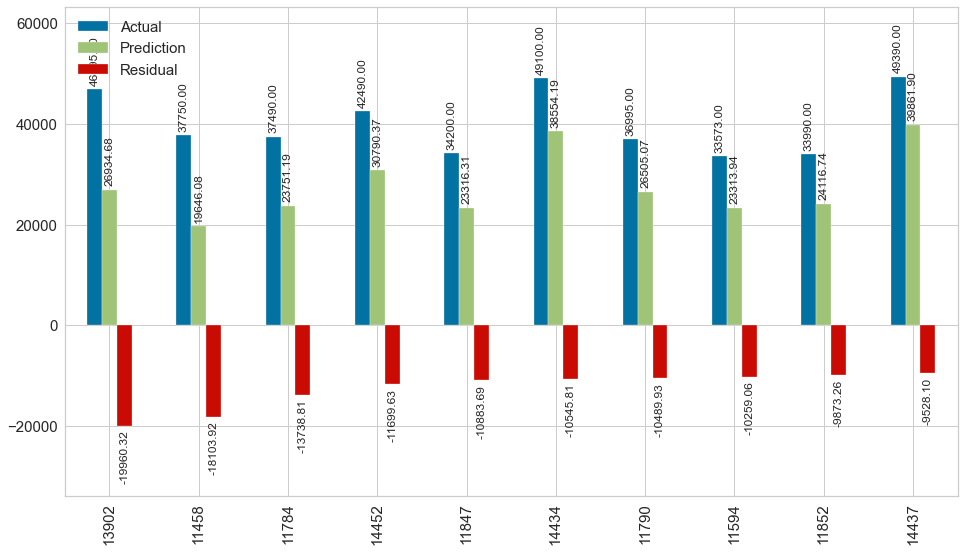

In [99]:
g = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head(10).plot.bar(figsize=(16,9))

# annotate
for i in g.containers:
    g.bar_label(i, fmt='%.2f', fontsize=12, rotation=90, padding=4)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.2) 

# tick_params(xaxis.set_tick_params) rotation or labelrotation
g.tick_params(axis='x', labelrotation=90)

In [100]:
# Calc Slope
lm_df2 = get_coeff_intercept(
    lin_model2.coef_, 
    lin_model2.intercept_
)
lm_df2

,Coefficient_linear
make_model_Audi A1,2640.328676
make_model_Audi A3,3955.581452
make_model_Opel Astra,-1257.794552
make_model_Opel Corsa,-3288.405697
make_model_Opel Insignia,1924.038004
...,...
ss_Tire pressure monitoring system,-133.275837
ss_Traction control,140.322734
ss_Traffic sign recognition,-52.092355
ss_Xenon headlights,-278.275255


## **Result:________**

- We used not scaled data because of the dummy features
- When we delete outliers by car model, our minimum and maximum residuals are reduced and our scores were improved.

# 4. Implement `Ridge` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value. 

In [101]:
from sklearn.linear_model import Ridge

In [102]:
scaler = MinMaxScaler() 
ridge_model = Ridge(alpha=1, random_state=42) 

In [103]:
# pipeline is used to combine scaler and model
pipe_ridge = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])

In [104]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [105]:
y_pred = pipe_ridge.predict(X_test)
y_train_pred = pipe_ridge.predict(X_train)

In [106]:
rs = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

0             ridge               
        ridge_train     ridge_test
R2         0.898293       0.892105
MAE     1545.017267    1522.471914
MSE  4736381.101506 4606468.550934
RMSE    2176.322839    2146.268518

In [107]:
pd.concat([ls, rs], axis = 1)

0            linear                         ridge               
       linear_train    linear_test    ridge_train     ridge_test
R2         0.889596       0.880148       0.898293       0.892105
MAE     1743.480097    1754.716851    1545.017267    1522.471914
MSE  6099597.123133 6535391.303867 4736381.101506 4606468.550934
RMSE    2469.736246    2556.441140    2176.322839    2146.268518

In [108]:
pd.Series(pipe_ridge['ridge'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               None
normalize        deprecated
positive              False
random_state             42
solver                 auto
tol                0.001000
dtype: object

## Ridge Regression Check Cross Validation with alpha : 1

In [109]:
pipe_ridge = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])

In [110]:
scores = cross_validate(
    pipe_ridge, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)

In [111]:
df_scores_ridge = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_ridge

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.037117,0.005883,0.896715,-1578.203591,-4840354.472737,-2200.080561
1,0.039003,0.006998,0.893006,-1601.915843,-4949988.903192,-2224.857052
2,0.045001,0.008000,0.884058,-1607.946292,-5496211.075959,-2344.399939
3,0.035999,0.006003,0.900121,-1499.129743,-4452789.042173,-2110.163274
4,0.041001,0.007083,0.899066,-1558.257059,-4815870.759813,-2194.509230


In [112]:
df_scores_ridge.iloc[:, 2:].mean()

test_r2                                   0.894593
test_neg_mean_absolute_error          -1569.090506
test_neg_mean_squared_error        -4911042.850775
test_neg_root_mean_squared_error      -2214.802011
dtype: float64

In [113]:
# crosscheck before-after
rs

0             ridge               
        ridge_train     ridge_test
R2         0.898293       0.892105
MAE     1545.017267    1522.471914
MSE  4736381.101506 4606468.550934
RMSE    2176.322839    2146.268518

In [114]:
rm_df = get_coeff_intercept(
    pipe_ridge["ridge"].coef_, 
    pipe_ridge["ridge"].intercept_, 
    model_name=f'ridge_alpha_{pipe_ridge["ridge"].alpha}'
)
rm_df

,Coefficient_ridge_alpha_1
make_model_Audi A1,2526.015248
make_model_Audi A3,3836.524598
make_model_Opel Astra,-1367.890759
make_model_Opel Corsa,-3406.344705
make_model_Opel Insignia,1814.920608
...,...
ss_Tire pressure monitoring system,-133.882215
ss_Traction control,141.499836
ss_Traffic sign recognition,-47.890841
ss_Xenon headlights,-277.329992


In [115]:
pd.concat([lm_df, rm_df], axis = 1)

,Coefficient_linear,Coefficient_ridge_alpha_1
make_model_Audi A1,-17459085174810914.000000,2526.015248
make_model_Audi A3,-17459085174809720.000000,3836.524598
make_model_Opel Astra,-17459085174814902.000000,-1367.890759
make_model_Opel Corsa,-17459085174816228.000000,-3406.344705
make_model_Opel Insignia,-17459085174811982.000000,1814.920608
...,...,...
ss_Tire pressure monitoring system,36.500000,-133.882215
ss_Traction control,221.562500,141.499836
ss_Traffic sign recognition,-92.000000,-47.890841
ss_Xenon headlights,-334.000000,-277.329992


##  Ridge Regression Choosing Alpha value

In [116]:
from sklearn.linear_model import RidgeCV

In [117]:
# define alpha_space (0.1, 1, 10)
alpha_space = np.linspace(1.5, 2.5, 21)
alpha_space

array([1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ,
       2.05, 2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ])

In [118]:
# will be used in pipeline later
ridgecv_model = RidgeCV(
    alphas=alpha_space, 
    scoring= "neg_root_mean_squared_error",
    cv = 10
)

In [119]:
# pipeline is used to combine scaler and model
pipe_ridgecv = Pipeline([
    ("scaler", scaler), 
    ("ridgecv", ridgecv_model)
]) 

In [120]:
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ,
       2.05, 2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [121]:
pipe_ridgecv["ridgecv"].alpha_

2.0

In [122]:
y_pred = pipe_ridgecv.predict(X_test)
y_train_pred = pipe_ridgecv.predict(X_train)

In [123]:
rcs = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "ridge_cv") 
rcs

0          ridge_cv               
     ridge_cv_train  ridge_cv_test
R2         0.898234       0.892083
MAE     1544.859100    1521.799932
MSE  4739161.399611 4607378.887757
RMSE    2176.961506    2146.480582

In [124]:
pd.concat([ls, rs, rcs], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.889596       0.880148       0.898293       0.892105   
MAE     1743.480097    1754.716851    1545.017267    1522.471914   
MSE  6099597.123133 6535391.303867 4736381.101506 4606468.550934   
RMSE    2469.736246    2556.441140    2176.322839    2146.268518   

0          ridge_cv                 
     ridge_cv_train  ridge_cv_test  
R2         0.898234       0.892083  
MAE     1544.859100    1521.799932  
MSE  4739161.399611 4607378.887757  
RMSE    2176.961506    2146.480582

In [125]:
pd.Series(pipe_ridgecv["ridgecv"].get_params())

alpha_per_target                                                False
alphas              [1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1...
cv                                                                 10
fit_intercept                                                    True
gcv_mode                                                         None
normalize                                                  deprecated
scoring                                   neg_root_mean_squared_error
store_cv_values                                                 False
dtype: object

In [126]:
rcm_df = get_coeff_intercept(
    pipe_ridgecv["ridgecv"].coef_, 
    pipe_ridgecv["ridgecv"].intercept_, 
    model_name=f'ridgecv_alpha_{pipe_ridgecv["ridgecv"].alpha_}'
)
rcm_df

,Coefficient_ridgecv_alpha_2.0
make_model_Audi A1,2441.037941
make_model_Audi A3,3746.826663
make_model_Opel Astra,-1448.657812
make_model_Opel Corsa,-3498.355168
make_model_Opel Insignia,1733.164519
...,...
ss_Tire pressure monitoring system,-133.904053
ss_Traction control,142.888420
ss_Traffic sign recognition,-44.506251
ss_Xenon headlights,-276.168631


In [127]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_2.0
make_model_Audi A1,-17459085174810914.000000,2526.015248,2441.037941
make_model_Audi A3,-17459085174809720.000000,3836.524598,3746.826663
make_model_Opel Astra,-17459085174814902.000000,-1367.890759,-1448.657812
make_model_Opel Corsa,-17459085174816228.000000,-3406.344705,-3498.355168
make_model_Opel Insignia,-17459085174811982.000000,1814.920608,1733.164519
...,...,...,...
ss_Tire pressure monitoring system,36.500000,-133.882215,-133.904053
ss_Traction control,221.562500,141.499836,142.888420
ss_Traffic sign recognition,-92.000000,-47.890841,-44.506251
ss_Xenon headlights,-334.000000,-277.329992,-276.168631


## **Result:________**

- 

# 5. Implement `Lasso` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True(If needed)**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value.
- **Compare different evaluation metrics**

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [128]:
from sklearn.linear_model import Lasso, LassoCV

In [129]:
scaler = MinMaxScaler() 
lasso_model = Lasso(alpha=1, random_state=42)

In [130]:
# pipeline is used to combine scaler and model
pipe_lasso = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
]) 

In [131]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [132]:
y_pred = pipe_lasso.predict(X_test)
y_train_pred = pipe_lasso.predict(X_train)

In [133]:
lss = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "lasso") 
lss

0             lasso               
        lasso_train     lasso_test
R2         0.898016       0.892259
MAE     1546.071049    1519.234152
MSE  4749296.115727 4599865.497975
RMSE    2179.287984    2144.729703

In [134]:
pd.concat([ls, rs, rcs, lss], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.889596       0.880148       0.898293       0.892105   
MAE     1743.480097    1754.716851    1545.017267    1522.471914   
MSE  6099597.123133 6535391.303867 4736381.101506 4606468.550934   
RMSE    2469.736246    2556.441140    2176.322839    2146.268518   

0          ridge_cv                         lasso                 
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test  
R2         0.898234       0.892083       0.898016       0.892259  
MAE     1544.859100    1521.799932    1546.071049    1519.234152  
MSE  4739161.399611 4607378.887757 4749296.115727 4599865.497975  
RMSE    2176.961506    2146.480582    2179.287984    2144.729703

In [135]:
pd.Series(pipe_lasso['lasso'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state             42
selection            cyclic
tol                0.000100
warm_start            False
dtype: object

## Lasso Regression Cross Validation with Default Alpha : 1

In [136]:
pipe_lasso = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
])

In [137]:
scores = cross_validate(
    pipe_lasso, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)

In [138]:
df_scores_lasso = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lasso

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.548218,0.007781,0.897529,-1572.879225,-4802213.989079,-2191.395443
1,0.520836,0.009001,0.893109,-1601.401995,-4945211.199465,-2223.783083
2,0.552002,0.010001,0.884581,-1604.659396,-5471406.795478,-2339.103845
3,0.531999,0.009001,0.900096,-1500.389192,-4453906.729792,-2110.428092
4,0.502998,0.010002,0.898836,-1559.188208,-4826842.723954,-2197.007675


In [139]:
df_scores_lasso.iloc[:, 2:].mean()

test_r2                                   0.894830
test_neg_mean_absolute_error          -1567.703603
test_neg_mean_squared_error        -4899916.287554
test_neg_root_mean_squared_error      -2212.343627
dtype: float64

In [140]:
# crosscheck before-after
lss

0             lasso               
        lasso_train     lasso_test
R2         0.898016       0.892259
MAE     1546.071049    1519.234152
MSE  4749296.115727 4599865.497975
RMSE    2179.287984    2144.729703

In [141]:
lsm_df = get_coeff_intercept(
    pipe_lasso["lasso"].coef_, 
    pipe_lasso["lasso"].intercept_, 
    model_name=f'lasso_alpha_{pipe_lasso["lasso"].alpha}'
)
lsm_df

,Coefficient_lasso_alpha_1
make_model_Audi A1,2314.937217
make_model_Audi A3,3643.995256
make_model_Opel Astra,-1566.065330
make_model_Opel Corsa,-3508.087222
make_model_Opel Insignia,1584.876728
...,...
ss_Tire pressure monitoring system,-121.955420
ss_Traction control,139.411788
ss_Traffic sign recognition,-3.067062
ss_Xenon headlights,-267.213706


In [142]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_2.0,Coefficient_lasso_alpha_1
make_model_Audi A1,-17459085174810914.000000,2526.015248,2441.037941,2314.937217
make_model_Audi A3,-17459085174809720.000000,3836.524598,3746.826663,3643.995256
make_model_Opel Astra,-17459085174814902.000000,-1367.890759,-1448.657812,-1566.065330
make_model_Opel Corsa,-17459085174816228.000000,-3406.344705,-3498.355168,-3508.087222
make_model_Opel Insignia,-17459085174811982.000000,1814.920608,1733.164519,1584.876728
...,...,...,...,...
ss_Tire pressure monitoring system,36.500000,-133.882215,-133.904053,-121.955420
ss_Traction control,221.562500,141.499836,142.888420,139.411788
ss_Traffic sign recognition,-92.000000,-47.890841,-44.506251,-3.067062
ss_Xenon headlights,-334.000000,-277.329992,-276.168631,-267.213706


## Lasso Regression choosing  best Alpha value

In [143]:
# define alpha_space (0.1, 1, 10)
alpha_space = np.linspace(0.75, 0.9, 26)
alpha_space

array([0.75 , 0.756, 0.762, 0.768, 0.774, 0.78 , 0.786, 0.792, 0.798,
       0.804, 0.81 , 0.816, 0.822, 0.828, 0.834, 0.84 , 0.846, 0.852,
       0.858, 0.864, 0.87 , 0.876, 0.882, 0.888, 0.894, 0.9  ])

In [144]:
# will be used in pipeline later
lassocv_model = LassoCV(
    alphas=alpha_space, 
    max_iter=100000, 
    cv=10, 
    random_state=42
)

In [145]:
pipe_lassocv = Pipeline([
    ("scaler", scaler), 
    ("lassocv", lassocv_model)
]) 

In [146]:
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.75 , 0.756, 0.762, 0.768, 0.774, 0.78 , 0.786, 0.792, 0.798,
       0.804, 0.81 , 0.816, 0.822, 0.828, 0.834, 0.84 , 0.846, 0.852,
       0.858, 0.864, 0.87 , 0.876, 0.882, 0.888, 0.894, 0.9  ]),
                         cv=10, max_iter=100000, random_state=42))])

In [147]:
pipe_lassocv["lassocv"].alpha_

0.8220000000000001

In [148]:
y_pred = pipe_lassocv.predict(X_test)   
y_train_pred = pipe_lassocv.predict(X_train)

In [149]:
lcs = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

0          lasso_cv               
     lasso_cv_train  lasso_cv_test
R2         0.898087       0.892281
MAE     1545.735686    1519.542459
MSE  4746000.975463 4598932.476696
RMSE    2178.531839    2144.512177

In [150]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.889596       0.880148       0.898293       0.892105   
MAE     1743.480097    1754.716851    1545.017267    1522.471914   
MSE  6099597.123133 6535391.303867 4736381.101506 4606468.550934   
RMSE    2469.736246    2556.441140    2176.322839    2146.268518   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.898234       0.892083       0.898016       0.892259   
MAE     1544.859100    1521.799932    1546.071049    1519.234152   
MSE  4739161.399611 4607378.887757 4749296.115727 4599865.497975   
RMSE    2176.961506    2146.480582    2179.287984    2144.729703   

0          lasso_cv                 
     lasso_cv_train  lasso_cv_test  
R2         0.898087       0.892281  
MAE     1545.735686    1519.542459  
MSE  4746000.975463 4598932.476696  
RMSE    2178.531839    2144.512177

In [151]:
lcm_df = get_coeff_intercept(
    pipe_lassocv["lassocv"].coef_, 
    pipe_lassocv["lassocv"].intercept_, 
    model_name=f'lassocv_alpha_{pipe_lassocv["lassocv"].alpha_}')
lcm_df

,Coefficient_lassocv_alpha_0.8220000000000001
make_model_Audi A1,2319.668993
make_model_Audi A3,3645.140537
make_model_Opel Astra,-1563.616156
make_model_Opel Corsa,-3520.811542
make_model_Opel Insignia,1592.989005
...,...
ss_Tire pressure monitoring system,-124.767151
ss_Traction control,138.933701
ss_Traffic sign recognition,-11.136787
ss_Xenon headlights,-268.476678


In [152]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_2.0,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.8220000000000001
make_model_Audi A1,-17459085174810914.000000,2526.015248,2441.037941,2314.937217,2319.668993
make_model_Audi A3,-17459085174809720.000000,3836.524598,3746.826663,3643.995256,3645.140537
make_model_Opel Astra,-17459085174814902.000000,-1367.890759,-1448.657812,-1566.065330,-1563.616156
make_model_Opel Corsa,-17459085174816228.000000,-3406.344705,-3498.355168,-3508.087222,-3520.811542
make_model_Opel Insignia,-17459085174811982.000000,1814.920608,1733.164519,1584.876728,1592.989005
...,...,...,...,...,...
ss_Tire pressure monitoring system,36.500000,-133.882215,-133.904053,-121.955420,-124.767151
ss_Traction control,221.562500,141.499836,142.888420,139.411788,138.933701
ss_Traffic sign recognition,-92.000000,-47.890841,-44.506251,-3.067062,-11.136787
ss_Xenon headlights,-334.000000,-277.329992,-276.168631,-267.213706,-268.476678


## **Result:________**

-

# 6. Implement `Elastic-Net` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True(If needed)**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value.
- **Compare different evaluation metrics**

In [153]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [154]:
# l1_ratio is used to control the amount of L1 and L2 regularization
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)

In [155]:
pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
]) 

In [156]:
pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [157]:
y_pred = pipe_elastic.predict(X_test)
y_train_pred = pipe_elastic.predict(X_train)

In [158]:
es = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "elastic")
es

0            elastic                
       elastic_train    elastic_test
R2          0.633756        0.632968
MAE      3113.190117     3014.823400
MSE  17055641.085076 15669989.500220
RMSE     4129.847586     3958.533756

In [159]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.889596       0.880148       0.898293       0.892105   
MAE     1743.480097    1754.716851    1545.017267    1522.471914   
MSE  6099597.123133 6535391.303867 4736381.101506 4606468.550934   
RMSE    2469.736246    2556.441140    2176.322839    2146.268518   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.898234       0.892083       0.898016       0.892259   
MAE     1544.859100    1521.799932    1546.071049    1519.234152   
MSE  4739161.399611 4607378.887757 4749296.115727 4599865.497975   
RMSE    2176.961506    2146.480582    2179.287984    2144.729703   

0          lasso_cv                        elastic                  
     lasso_cv_train  lasso_cv_test   elastic_train    elastic_test  
R2         0.898087       0.892281        0.633756        0.632968  
MAE     1545.735686    1519.542459     3113.190117     3014.823400  
MSE  4746000.975463 4598932.476696 17055641.085076 15669989.500220  
RMSE    2178.531839    2144.512177     4129.847586     3958.533756

In [160]:
pd.Series(pipe_elastic["elastic"].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
l1_ratio           0.500000
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state             42
selection            cyclic
tol                0.000100
warm_start            False
dtype: object

## Elastic_net Regression Check Cross Validation with Default Alpha : 1 and l1_ratio=0.5

In [161]:
model = Pipeline([
    ("scaler", scaler), 
    ("elastic", ElasticNet(alpha=1, l1_ratio=0.5, random_state=42))
])

In [162]:
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error']
    , cv=5
)

In [163]:
df_scores_elastic = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_elastic

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.077041,0.008956,0.635369,-3131.265136,-17088106.061290,-4133.776247
1,0.072857,0.007998,0.627244,-3128.304081,-17245301.230250,-4152.746228
2,0.074995,0.010000,0.631263,-3101.155577,-17479928.779329,-4180.900475
3,0.070004,0.009000,0.634638,-3049.896236,-16288501.494987,-4035.901572
4,0.074003,0.006995,0.637103,-3161.365117,-17314921.384655,-4161.120208


In [164]:
df_scores_elastic.iloc[:, 2:].mean()

test_r2                                    0.633123
test_neg_mean_absolute_error           -3114.397229
test_neg_mean_squared_error        -17083351.790102
test_neg_root_mean_squared_error       -4132.888946
dtype: float64

In [165]:
# crosscheck before-after
es

0            elastic                
       elastic_train    elastic_test
R2          0.633756        0.632968
MAE      3113.190117     3014.823400
MSE  17055641.085076 15669989.500220
RMSE     4129.847586     3958.533756

In [166]:
dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)

{'alpha': 1, 'l1_ratio': 0.5}

In [167]:
em_df = get_coeff_intercept(
    pipe_elastic["elastic"].coef_, 
    pipe_elastic["elastic"].intercept_, 
    model_name=f'elastic_{dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)}')
em_df

,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
make_model_Audi A1,346.267369
make_model_Audi A3,691.667276
make_model_Opel Astra,-486.003388
make_model_Opel Corsa,-878.121784
make_model_Opel Insignia,226.007040
...,...
ss_Tire pressure monitoring system,-185.585976
ss_Traction control,56.700150
ss_Traffic sign recognition,324.656634
ss_Xenon headlights,381.911145


In [168]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_2.0,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.8220000000000001,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
make_model_Audi A1,-17459085174810914.000000,2526.015248,2441.037941,2314.937217,2319.668993,346.267369
make_model_Audi A3,-17459085174809720.000000,3836.524598,3746.826663,3643.995256,3645.140537,691.667276
make_model_Opel Astra,-17459085174814902.000000,-1367.890759,-1448.657812,-1566.065330,-1563.616156,-486.003388
make_model_Opel Corsa,-17459085174816228.000000,-3406.344705,-3498.355168,-3508.087222,-3520.811542,-878.121784
make_model_Opel Insignia,-17459085174811982.000000,1814.920608,1733.164519,1584.876728,1592.989005,226.007040
...,...,...,...,...,...,...
ss_Tire pressure monitoring system,36.500000,-133.882215,-133.904053,-121.955420,-124.767151,-185.585976
ss_Traction control,221.562500,141.499836,142.888420,139.411788,138.933701,56.700150
ss_Traffic sign recognition,-92.000000,-47.890841,-44.506251,-3.067062,-11.136787,324.656634
ss_Xenon headlights,-334.000000,-277.329992,-276.168631,-267.213706,-268.476678,381.911145


## **`Grid Search` for ElasticNet for choosing best elastic__alpha - elastic__l1_ratio**

In [169]:
from sklearn.model_selection import GridSearchCV

In [170]:
elastic_model = ElasticNet(max_iter=100000, random_state=42) 

In [171]:
pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
])

In [172]:
# define alpha_space vs ridge, lasso or (0.1, 1, 10)
alpha_space = np.linspace(0.80, 0.85, 11)
alpha_space

array([0.8  , 0.805, 0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 ,
       0.845, 0.85 ])

In [173]:
# define elastic__l1_ratio (0.1, 1)
ratio_space = np.linspace(0.5, 1, 5)
ratio_space

array([0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [174]:
param_grid = {"elastic__alpha":alpha_space,
            "elastic__l1_ratio":ratio_space}

In [175]:
grid_model = GridSearchCV(
    estimator = pipe_elastic, 
    param_grid = param_grid, 
    scoring = 'neg_root_mean_squared_error',
    cv =10, verbose =2
)

In [176]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 55 candidates, totalling 550 fits
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.8, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ........elastic__alpha=0.8, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END ........elastic__alpha=0.8, elastic__

[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.81, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .......elastic__alpha=0.81, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.81, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.81, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.81, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alp

[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END elastic__alpha=0.8200000000000001, elas

[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.83, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .......elastic__alpha=0.83, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.83, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.83, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.83, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alp

[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.84, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .......elastic__alpha=0.84, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.84, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.84, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.84, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.84, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.84, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.84, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alp

[CV] END .........elastic__alpha=0.85, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .........elastic__alpha=0.85, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END .......elastic__alpha=0.85, elastic__l1_ratio=0.625; total time=   0.0s
[CV] END ........elastic__al

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('elastic',
                                        ElasticNet(max_iter=100000,
                                                   random_state=42))]),
             param_grid={'elastic__alpha': array([0.8  , 0.805, 0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 ,
       0.845, 0.85 ]),
                         'elastic__l1_ratio': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [177]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [178]:
gm = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm

0          elastic_grid                  
     elastic_grid_train elastic_grid_test
R2             0.898095          0.892283
MAE         1545.700546       1519.593221
MSE      4745634.868802    4598857.002295
RMSE        2178.447812       2144.494580

In [179]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.889596       0.880148       0.898293       0.892105   
MAE     1743.480097    1754.716851    1545.017267    1522.471914   
MSE  6099597.123133 6535391.303867 4736381.101506 4606468.550934   
RMSE    2469.736246    2556.441140    2176.322839    2146.268518   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.898234       0.892083       0.898016       0.892259   
MAE     1544.859100    1521.799932    1546.071049    1519.234152   
MSE  4739161.399611 4607378.887757 4749296.115727 4599865.497975   
RMSE    2176.961506    2146.480582    2179.287984    2144.729703   

0          lasso_cv                        elastic                  \
     lasso_cv_train  lasso_cv_test   elastic_train    elastic_test   
R2         0.898087       0.892281        0.633756        0.632968   
MAE     1545.735686    1519.542459     3113.190117     3014.823400   
MSE  4746000.975463 4598932.476696 17055641.085076 15669989.500220   
RMSE    2178.531839    2144.512177     4129.847586     3958.533756   

0          elastic_grid                    
     elastic_grid_train elastic_grid_test  
R2             0.898095          0.892283  
MAE         1545.700546       1519.593221  
MSE      4745634.868802    4598857.002295  
RMSE        2178.447812       2144.494580

In [180]:
# pd.Series(grid_model.get_params())

In [181]:
grid_model.best_params_

{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}

In [182]:
grid_model.best_score_

-2211.147139172406

In [183]:
grid_model.best_index_

4

In [184]:
egm_df = get_coeff_intercept(
    grid_model.best_estimator_.named_steps['elastic'].coef_, 
    grid_model.best_estimator_.named_steps['elastic'].intercept_, 
    model_name=f'elastic_grid_{grid_model.best_params_}')
egm_df

,"Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}"
make_model_Audi A1,2320.277346
make_model_Audi A3,3645.282584
make_model_Opel Astra,-1563.290405
make_model_Opel Corsa,-3522.415633
make_model_Opel Insignia,1594.023460
...,...
ss_Tire pressure monitoring system,-125.099664
ss_Traction control,138.880108
ss_Traffic sign recognition,-12.149763
ss_Xenon headlights,-268.639057


In [185]:
df_coeff = pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, egm_df], axis = 1)
df_coeff

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_2.0,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.8220000000000001,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}","Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}"
make_model_Audi A1,-17459085174810914.000000,2526.015248,2441.037941,2314.937217,2319.668993,346.267369,2320.277346
make_model_Audi A3,-17459085174809720.000000,3836.524598,3746.826663,3643.995256,3645.140537,691.667276,3645.282584
make_model_Opel Astra,-17459085174814902.000000,-1367.890759,-1448.657812,-1566.065330,-1563.616156,-486.003388,-1563.290405
make_model_Opel Corsa,-17459085174816228.000000,-3406.344705,-3498.355168,-3508.087222,-3520.811542,-878.121784,-3522.415633
make_model_Opel Insignia,-17459085174811982.000000,1814.920608,1733.164519,1584.876728,1592.989005,226.007040,1594.023460
...,...,...,...,...,...,...,...
ss_Tire pressure monitoring system,36.500000,-133.882215,-133.904053,-121.955420,-124.767151,-185.585976,-125.099664
ss_Traction control,221.562500,141.499836,142.888420,139.411788,138.933701,56.700150,138.880108
ss_Traffic sign recognition,-92.000000,-47.890841,-44.506251,-3.067062,-11.136787,324.656634,-12.149763
ss_Xenon headlights,-334.000000,-277.329992,-276.168631,-267.213706,-268.476678,381.911145,-268.639057


### Grid Search for ElasticNet vs Lasso Result

In [186]:
df_coeff.columns

Index(['Coefficient_linear', 'Coefficient_ridge_alpha_1',
       'Coefficient_ridgecv_alpha_2.0', 'Coefficient_lasso_alpha_1',
       'Coefficient_lassocv_alpha_0.8220000000000001',
       'Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}',
       'Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}'],
      dtype='object')

In [187]:
df_coeff.iloc[:, [4, 6]]

,Coefficient_lassocv_alpha_0.8220000000000001,"Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}"
make_model_Audi A1,2319.668993,2320.277346
make_model_Audi A3,3645.140537,3645.282584
make_model_Opel Astra,-1563.616156,-1563.290405
make_model_Opel Corsa,-3520.811542,-3522.415633
make_model_Opel Insignia,1592.989005,1594.023460
...,...,...
ss_Tire pressure monitoring system,-124.767151,-125.099664
ss_Traction control,138.933701,138.880108
ss_Traffic sign recognition,-11.136787,-12.149763
ss_Xenon headlights,-268.476678,-268.639057


In [188]:
# check difference zero
df_coeff.iloc[:, [4, 6]].diff(axis=1).sum()

Coefficient_lassocv_alpha_0.8220000000000001                                   0.000000
Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}   -85.019479
dtype: float64

## **Result:________**

- my model work %100 lasso and alpha value:0.8

# 7. `Feature importances` In a Graph

## Feature importances with Ridge

In [189]:
pipe_ridgecv["ridgecv"].alpha_

2.0

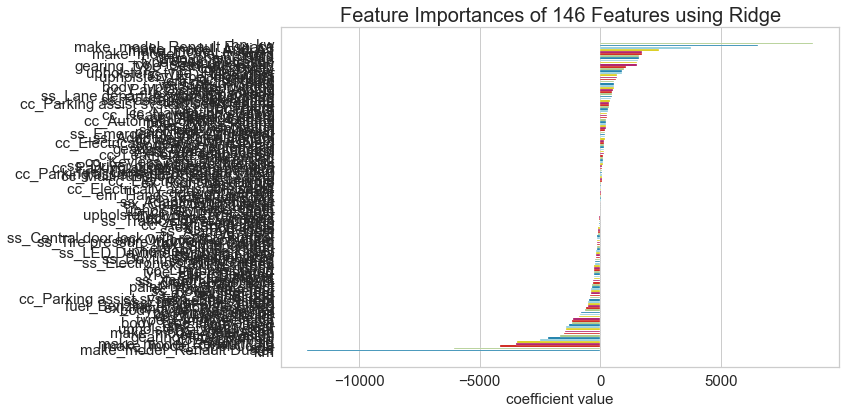

<AxesSubplot:title={'center':'Feature Importances of 146 Features using Ridge'}, xlabel='coefficient value'>

In [190]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)
viz = FeatureImportances(model,labels=X_train.columns.to_list(),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

## Feature importances with Lasso

In [191]:
pipe_lassocv["lassocv"].alpha_

0.8220000000000001

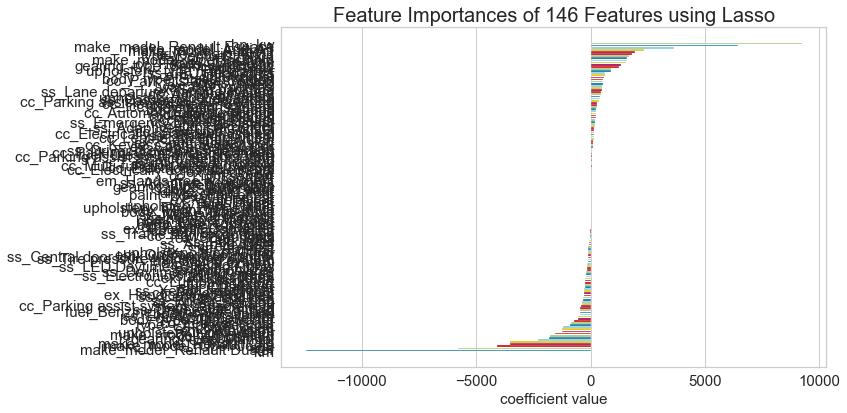

<AxesSubplot:title={'center':'Feature Importances of 146 Features using Lasso'}, xlabel='coefficient value'>

In [192]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  
viz = FeatureImportances(model,labels=X_train.columns.to_list(),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

In [193]:
viz.estimator.alpha

0.8220000000000001

In [194]:
viz.estimator.l1_ratio

1.0

In [195]:
pd.Series(viz.feature_importances_, index=viz.features_
    ).sort_values(key =abs, ascending=False
    ).to_frame(f'Coefficient_Viz_{viz.estimator}').head(10)

,Coefficient_Viz_Lasso(alpha=0.8220000000000001)
km,-12426.151515
hp_kw,9222.919510
make_model_Renault Espace,6428.922964
make_model_Renault Duster,-5797.349093
age,-4101.715350
make_model_Audi A3,3645.140537
make_model_Opel Corsa,-3520.811542
make_model_Renault Clio,-3507.062689
make_model_Audi A1,2319.668993
weight_kg,-2279.539361


In [196]:
egm_df.sort_values(by=egm_df.columns[0], key =abs, ascending=False).head(11)

,"Coefficient_elastic_grid_{'elastic__alpha': 0.8, 'elastic__l1_ratio': 1.0}"
intercept,18854.969666
km,-12430.053307
hp_kw,9220.720162
make_model_Renault Espace,6432.060345
make_model_Renault Duster,-5827.477330
age,-4101.025304
make_model_Audi A3,3645.282584
make_model_Opel Corsa,-3522.415633
make_model_Renault Clio,-3508.671723
make_model_Audi A1,2320.277346


# 8. Final Model

In [198]:
df2.shape

(14092, 24)

In [199]:
df_final = df2[["make_model", "hp_kw", "km","age", "price", "gearing_type", "gears"]]
df_final

,make_model,hp_kw,km,age,price,gearing_type,gears
0,Audi A1,66.000000,56013.000000,3.000000,15770,Automatic,5.000000
1,Audi A1,141.000000,80000.000000,2.000000,14500,Automatic,7.000000
2,Audi A1,85.000000,83450.000000,3.000000,14640,Automatic,5.000000
3,Audi A1,66.000000,73000.000000,3.000000,14500,Automatic,6.000000
4,Audi A1,66.000000,16200.000000,3.000000,16790,Automatic,5.000000
...,...,...,...,...,...,...,...
14473,Renault Espace,165.000000,1000.000000,0.000000,39950,Automatic,7.000000
14474,Renault Espace,147.000000,10.000000,2.000000,39950,Automatic,6.000000
14475,Renault Espace,165.000000,9900.000000,0.000000,39885,Automatic,7.000000
14476,Renault Espace,146.000000,15.000000,0.000000,39875,Automatic,6.000000


In [200]:
X = df_final.drop(columns=["price"])
y = df_final["price"]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [202]:
X_train, X_test = trans_2_OneHotEncoder(X_train, X_test)

In [203]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,11273.000000,0.172004,0.377401,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,11273.000000,0.195245,0.396407,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,11273.000000,0.153287,0.360280,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,11273.000000,0.146190,0.353312,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,11273.000000,0.164641,0.370873,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Clio,11273.000000,0.104497,0.305918,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Duster,11273.000000,0.002040,0.045125,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Espace,11273.000000,0.062095,0.241339,0.000000,0.000000,0.000000,0.000000,1.000000
gearing_type_Automatic,11273.000000,0.454449,0.497943,0.000000,0.000000,0.000000,1.000000,1.000000
gearing_type_Manual,11273.000000,0.516899,0.499737,0.000000,0.000000,1.000000,1.000000,1.000000


In [204]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,2819.000000,0.168499,0.374376,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,2819.000000,0.197588,0.398250,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,2819.000000,0.167081,0.373114,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,2819.000000,0.145796,0.352965,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,2819.000000,0.158922,0.365668,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Clio,2819.000000,0.097552,0.296761,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Duster,2819.000000,0.003902,0.062356,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Renault Espace,2819.000000,0.060660,0.238748,0.000000,0.000000,0.000000,0.000000,1.000000
gearing_type_Automatic,2819.000000,0.442710,0.496795,0.000000,0.000000,0.000000,1.000000,1.000000
gearing_type_Manual,2819.000000,0.530685,0.499146,0.000000,0.000000,1.000000,1.000000,1.000000


## Final Scores-Metrics

In [205]:
scaler = MinMaxScaler()
model = Lasso()

In [206]:
# pipeline is used to combine scaler and model
pipe_final = Pipeline([
    ("scaler", scaler), 
    ("lasso", model)
]) 

In [207]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('lasso', Lasso())])

In [208]:
y_pred = pipe_final.predict(X_test)
y_train_pred = pipe_final.predict(X_train)

In [209]:
fs = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "lasso") 
fs

0             lasso               
        lasso_train     lasso_test
R2         0.861742       0.859853
MAE     1766.238000    1722.370233
MSE  6438531.991365 5983391.535674
RMSE    2537.426253    2446.097205

## Final Cross Validate

In [210]:
pipe_final = Pipeline([
    ("scaler", scaler), 
    ("lasso", model)
])

In [211]:
scores = cross_validate(
    pipe_final, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)

In [212]:
df_scores_finalcv = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_finalcv

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.044069,0.002928,0.867283,-1762.562475,-6219673.941180,-2493.927413
1,0.040998,0.003000,0.859712,-1786.205623,-6490331.021976,-2547.612808
2,0.046000,0.002003,0.847249,-1818.380929,-7241118.691939,-2690.932681
3,0.038999,0.003000,0.872851,-1680.659490,-5668531.164902,-2380.867734
4,0.031999,0.002005,0.860554,-1793.906405,-6653397.679305,-2579.418089


In [213]:
df_scores_finalcv.iloc[:, 2:].mean()

test_r2                                   0.861530
test_neg_mean_absolute_error          -1768.342984
test_neg_mean_squared_error        -6454610.499860
test_neg_root_mean_squared_error      -2538.551745
dtype: float64

In [214]:
fs

0             lasso               
        lasso_train     lasso_test
R2         0.861742       0.859853
MAE     1766.238000    1722.370233
MSE  6438531.991365 5983391.535674
RMSE    2537.426253    2446.097205

## GridSearchCV Final Model

In [215]:
scaler = MinMaxScaler()
model = Lasso()

In [216]:
pipe_final = Pipeline([
    ("scaler", scaler), 
    ("lasso", model)
])

In [217]:
alpha_space = np.linspace(0.1, 1, 19)
alpha_space

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [218]:
param_grid = {"lasso__alpha":alpha_space}

In [219]:
grid_model_final = GridSearchCV(
    estimator = pipe_final, 
    param_grid = param_grid, 
    scoring = 'neg_root_mean_squared_error',
    cv =10
)

In [220]:
grid_model_final.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__scaler', 'estimator__lasso', 'estimator__scaler__clip', 'estimator__scaler__copy', 'estimator__scaler__feature_range', 'estimator__lasso__alpha', 'estimator__lasso__copy_X', 'estimator__lasso__fit_intercept', 'estimator__lasso__max_iter', 'estimator__lasso__normalize', 'estimator__lasso__positive', 'estimator__lasso__precompute', 'estimator__lasso__random_state', 'estimator__lasso__selection', 'estimator__lasso__tol', 'estimator__lasso__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [221]:
grid_model_final.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
             scoring='neg_root_mean_squared_error')

In [222]:
y_pred = grid_model_final.predict(X_test)
y_train_pred = grid_model_final.predict(X_train)

In [223]:
gm_final = get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "lasso_grid_final")
gm_final

0          lasso_grid_final                      
     lasso_grid_final_train lasso_grid_final_test
R2                 0.861757              0.859798
MAE             1767.586077           1724.067811
MSE          6437823.840751        5985740.747962
RMSE            2537.286708           2446.577354

In [224]:
df_scores_final = pd.concat([ls, rs, rcs, lss, lcs, es, gm, gm_final], axis = 1)
df_scores_final

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.889596       0.880148       0.898293       0.892105   
MAE     1743.480097    1754.716851    1545.017267    1522.471914   
MSE  6099597.123133 6535391.303867 4736381.101506 4606468.550934   
RMSE    2469.736246    2556.441140    2176.322839    2146.268518   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.898234       0.892083       0.898016       0.892259   
MAE     1544.859100    1521.799932    1546.071049    1519.234152   
MSE  4739161.399611 4607378.887757 4749296.115727 4599865.497975   
RMSE    2176.961506    2146.480582    2179.287984    2144.729703   

0          lasso_cv                        elastic                  \
     lasso_cv_train  lasso_cv_test   elastic_train    elastic_test   
R2         0.898087       0.892281        0.633756        0.632968   
MAE     1545.735686    1519.542459     3113.190117     3014.823400   
MSE  4746000.975463 4598932.476696 17055641.085076 15669989.500220   
RMSE    2178.531839    2144.512177     4129.847586     3958.533756   

0          elastic_grid                         lasso_grid_final  \
     elastic_grid_train elastic_grid_test lasso_grid_final_train   
R2             0.898095          0.892283               0.861757   
MAE         1545.700546       1519.593221            1767.586077   
MSE      4745634.868802    4598857.002295         6437823.840751   
RMSE        2178.447812       2144.494580            2537.286708   

0                           
     lasso_grid_final_test  
R2                0.859798  
MAE            1724.067811  
MSE         5985740.747962  
RMSE           2446.577354

In [225]:
grid_model_final.best_params_

{'lasso__alpha': 0.1}

In [226]:
grid_model_final.best_score_

-2538.8256061587963

In [227]:
lgm_df_final = get_coeff_intercept(
    grid_model_final.best_estimator_['lasso'].coef_, 
    grid_model_final.best_estimator_['lasso'].intercept_, 
    model_name=f'lasso_grid_final_{grid_model_final.best_params_}',
    columns=X_train.columns
)
lgm_df_final

,Coefficient_lasso_grid_final_{'lasso__alpha': 0.1}
make_model_Audi A1,1990.678940
make_model_Audi A3,3193.101945
make_model_Opel Astra,-2017.821585
make_model_Opel Corsa,-4220.139010
make_model_Opel Insignia,1491.570311
make_model_Renault Clio,-3552.841089
make_model_Renault Duster,-6604.625862
make_model_Renault Espace,8328.289574
gearing_type_Automatic,1567.328379
gearing_type_Manual,-372.004516


In [228]:
2945/df_final['price'].mean()

0.1667240304861684

# 8. Visually Compare Models Performance In a Graph

## 7. Visually Compare Models Scores

In [229]:
scores = df_scores_final.T
scores = scores.droplevel(0)
scores

,R2,MAE,MSE,RMSE
linear_train,0.889596,1743.480097,6099597.123133,2469.736246
linear_test,0.880148,1754.716851,6535391.303867,2556.441140
ridge_train,0.898293,1545.017267,4736381.101506,2176.322839
ridge_test,0.892105,1522.471914,4606468.550934,2146.268518
ridge_cv_train,0.898234,1544.859100,4739161.399611,2176.961506
ridge_cv_test,0.892083,1521.799932,4607378.887757,2146.480582
lasso_train,0.898016,1546.071049,4749296.115727,2179.287984
lasso_test,0.892259,1519.234152,4599865.497975,2144.729703
lasso_cv_train,0.898087,1545.735686,4746000.975463,2178.531839
lasso_cv_test,0.892281,1519.542459,4598932.476696,2144.512177


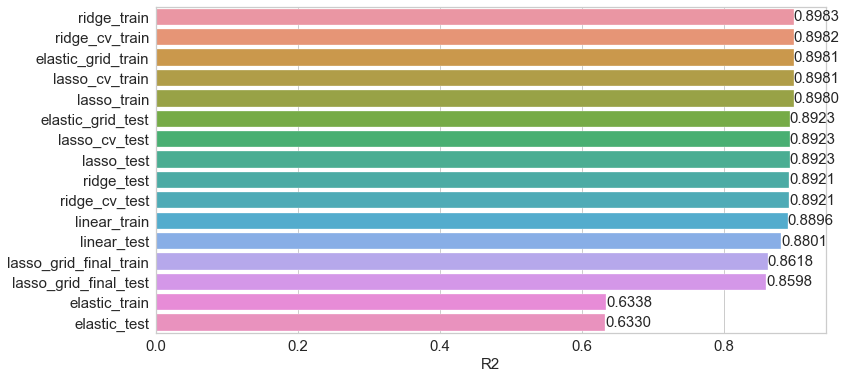

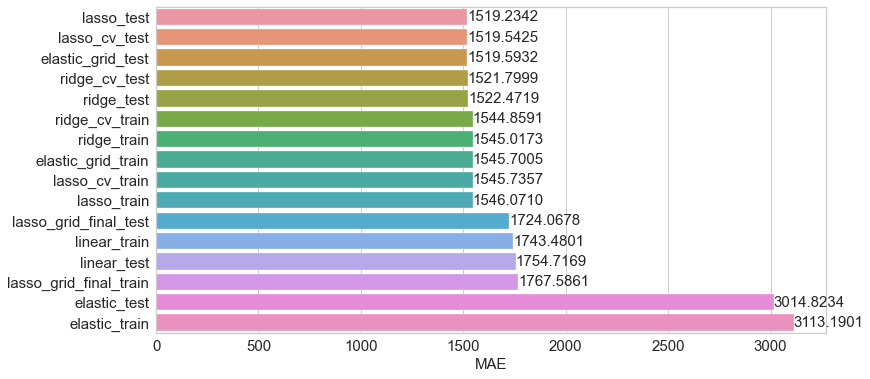

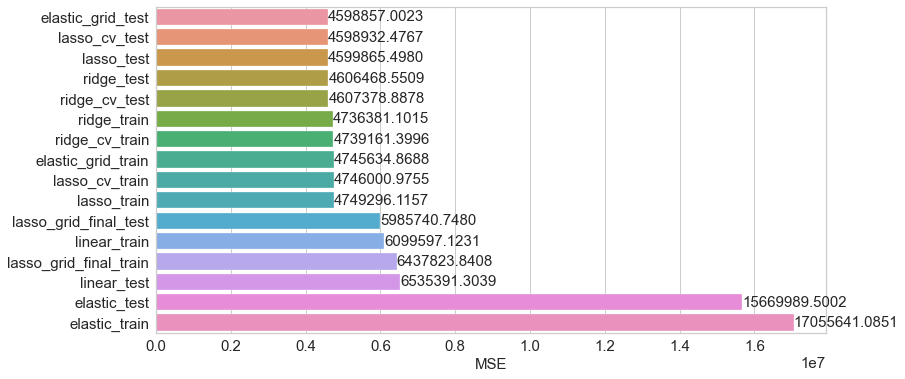

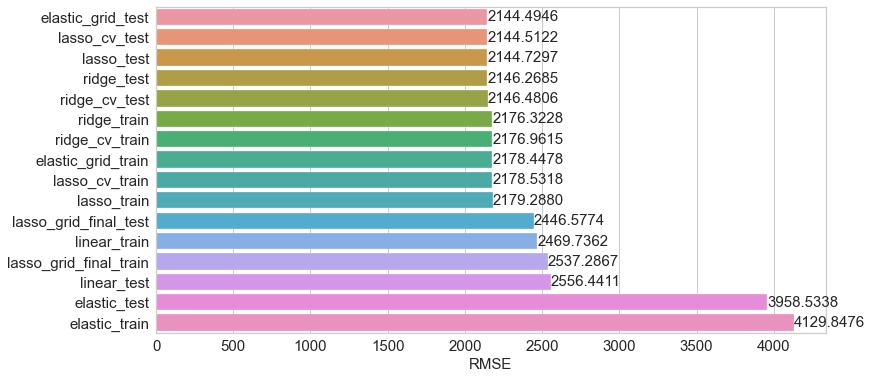

In [230]:
#metrics = scores.columns
for i, j in enumerate(scores):
    ascending = False if (j=="R2") else True
    compare = scores.sort_values(by=j, ascending=ascending)
    
    plt.figure(i)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    ax.bar_label(ax.containers[0], fmt="%.4f");

# Prediction new observation

In [231]:
X = df_final.drop(columns=["price"])
y = df_final["price"]

In [232]:
X.head(2)

,make_model,hp_kw,km,age,gearing_type,gears
0,Audi A1,66.000000,56013.000000,3.000000,Automatic,5.000000
1,Audi A1,141.000000,80000.000000,2.000000,Automatic,7.000000


In [233]:
cat = X.select_dtypes("object").columns.to_list()
cat

['make_model', 'gearing_type']

In [234]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [235]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

pipe_model = Pipeline(steps=[
    ("OneHotEncoder", column_trans), 
    ("Lasso", Lasso())
])
pipe_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'gearing_type'])])),
                ('Lasso', Lasso())])

In [236]:
my_dict = {
    "hp_kw": 66,
    "age": 2,
    "km": 17000,
    "gears": 7,
    "make_model": 'Audi A3',
    "gearing_type": "Automatic"
}

In [237]:
new_obs = pd.DataFrame([my_dict])
new_obs

,hp_kw,age,km,gears,make_model,gearing_type
0,66,2,17000,7,Audi A3,Automatic


In [238]:
pipe_model.predict(new_obs)

array([19676.87391232])

## Cross Validate With Pipeline

In [239]:
X = df_final.drop(columns=["price"])
y = df_final[["price"]]

In [240]:
cat = X.select_dtypes("object").columns.to_list()
cat

['make_model', 'gearing_type']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [242]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

pipe_model = Pipeline(steps=[
    ("OneHotEncoder", column_trans), 
    ("lasso", Lasso())
])
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'gearing_type'])])),
                ('lasso', Lasso())])

In [243]:
pipe_model.predict(new_obs)

array([19659.5676312])

In [244]:
y_pred = pipe_model.predict(X_test)   
y_train_pred = pipe_model.predict(X_train)

In [245]:
get_metrics_train_test(y_train, y_train_pred, y_test, y_pred, "lasso")

0             lasso               
        lasso_train     lasso_test
R2         0.861742       0.859853
MAE     1766.238000    1722.370233
MSE  6438531.991365 5983391.535674
RMSE    2537.426253    2446.097205

In [246]:
pipe_model = Pipeline(steps=[
    ("OneHotEncoder", column_trans), 
    ("lasso", Lasso())
])

scores = cross_validate(
    pipe_model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error']
    , cv=10
)

scores = pd.DataFrame.from_dict(scores, orient='columns')
scores.iloc[:,2:].mean()

test_r2                                   0.861324
test_neg_mean_absolute_error          -1768.791334
test_neg_mean_squared_error        -6457499.564363
test_neg_root_mean_squared_error      -2538.983568
dtype: float64

## **`Result:________`**

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___